# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



### Importación de librerías necesarias

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [80]:
df = pd.read_csv('datasets_calificaciones.csv')

df.head(10)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%
5,javier soto,fisica,5.8,6.5,6,80%
6,sofia díaz,ciencias sociales,9.5,9.1,,98%
7,miguel fernández,literatura universal,8,7.8,8.2,85%
8,valentina ruiz,matematicas,7,,7.8,90%
9,diego castro,fisica,6.8,7.2,7.5,93%


### Exploración inicial de los datos

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [82]:
df.isnull().sum()

estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64

In [83]:
df[["Parcial 1", "Parcial 2", "Final"]].describe()

,Parcial 1,Parcial 2,Final
count,95,90,89
unique,49,45,46
top,,7.5,9.5
freq,7,5,4


### Limpieza y normalización de los datos

In [84]:
df["estudiante"] = df["estudiante"].str.title().str.strip()

df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,matematicas,8,7.5,9,95%
1,Carlos López,fisica,6.2,7,NaN,88%
2,María Gómez,quimica,9,8.8,9.5,100%
3,Pedro Rodríguez,historia,7.5,6,7,75
4,Laura Vargas,matematicas,,9.2,8.5,92%


In [85]:
df["Materia"] = df["Materia"].str.title().str.strip()

df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8,7.5,9,95%
1,Carlos López,Fisica,6.2,7,NaN,88%
2,María Gómez,Quimica,9,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6,7,75
4,Laura Vargas,Matematicas,,9.2,8.5,92%


In [86]:
df["Parcial 1"] = pd.to_numeric(df["Parcial 1"], errors="coerce")
df["Parcial 2"] = pd.to_numeric(df["Parcial 2"], errors="coerce")
df["Final"] = pd.to_numeric(df["Final"], errors="coerce")

df.head(10)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95%
1,Carlos López,Fisica,6.2,7.0,NaN,88%
2,María Gómez,Quimica,9.0,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matematicas,NaN,9.2,8.5,92%
5,Javier Soto,Fisica,5.8,6.5,6.0,80%
6,Sofia Díaz,Ciencias Sociales,9.5,9.1,NaN,98%
7,Miguel Fernández,Literatura Universal,8.0,7.8,8.2,85%
8,Valentina Ruiz,Matematicas,7.0,NaN,7.8,90%
9,Diego Castro,Fisica,6.8,7.2,7.5,93%


In [87]:
df["Asistencia"] = df["Asistencia"].replace(r'[%,]', '', regex=True)

df["Asistencia"] = pd.to_numeric(df["Asistencia"])

df.loc[df["Asistencia"] > 100, "Asistencia"] = 100

df["Asistencia"] = df["Asistencia"].astype(str) + "%"

df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95%
1,Carlos López,Fisica,6.2,7.0,NaN,88%
2,María Gómez,Quimica,9.0,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75%
4,Laura Vargas,Matematicas,NaN,9.2,8.5,92%


In [88]:
df["Parcial 1"].fillna(df["Parcial 1"].mean(), inplace=True)
df["Parcial 2"].fillna(df["Parcial 2"].mean(), inplace=True)
df["Final"].fillna(df["Final"].mean(), inplace=True)

df.head(10)

C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_16080\1659295656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Parcial 1"].fillna(df["Parcial 1"].mean(), inplace=True)
C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_16080\1659295656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.000000,7.500000,9.000000,95%
1,Carlos López,Fisica,6.200000,7.000000,7.894118,88%
2,María Gómez,Quimica,9.000000,8.800000,9.500000,100%
3,Pedro Rodríguez,Historia,7.500000,6.000000,7.000000,75%
4,Laura Vargas,Matematicas,7.831818,9.200000,8.500000,92%
5,Javier Soto,Fisica,5.800000,6.500000,6.000000,80%
6,Sofia Díaz,Ciencias Sociales,9.500000,9.100000,7.894118,98%
7,Miguel Fernández,Literatura Universal,8.000000,7.800000,8.200000,85%
8,Valentina Ruiz,Matematicas,7.000000,7.830682,7.800000,90%
9,Diego Castro,Fisica,6.800000,7.200000,7.500000,93%


In [89]:
df.describe()

,Parcial 1,Parcial 2,Final
count,100.000000,100.000000,100.000000
mean,7.831818,7.830682,7.894118
std,1.134184,1.108950,1.111133
min,5.500000,5.800000,5.700000
25%,7.075000,6.975000,7.100000
50%,7.831818,7.830682,7.894118
75%,8.800000,8.800000,8.825000
max,9.900000,9.900000,9.900000


In [90]:
mediana_parcial_1 = df["Parcial 1"].median()
mediana_parcial_2 = df["Parcial 2"].median()
mediana_final= df["Final"].median()

mediana_parcial_1, mediana_parcial_2, mediana_final

(np.float64(7.831818181818182),
 np.float64(7.8306818181818185),
 np.float64(7.894117647058824))

In [91]:
promedio_por_materia = df.groupby('Materia')[["Parcial 1", "Parcial 2", "Final"]].mean()

promedio_por_materia

,Parcial 1,Parcial 2,Final
Materia,,,
Ciencias Sociales,9.500000,9.100000,7.894118
Fisica,6.573295,6.849669,6.624755
Historia,7.375000,7.026278,7.482353
Literatura Universal,8.000000,7.800000,8.200000
Matematicas,8.087636,8.261818,8.471059
Programacion Basica,7.831818,5.900000,6.300000
Quimica,9.204167,9.195833,9.027941


### Visualización de los datos

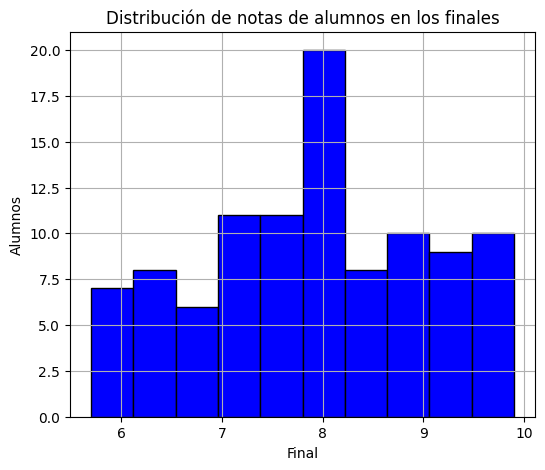

In [96]:
plt.figure(figsize=(6, 5))
plt.hist(df["Final"], color="blue", edgecolor="black")
plt.title("Distribución de notas de alumnos en los finales")
plt.xlabel("Final")
plt.ylabel("Alumnos")
plt.grid()
plt.show()

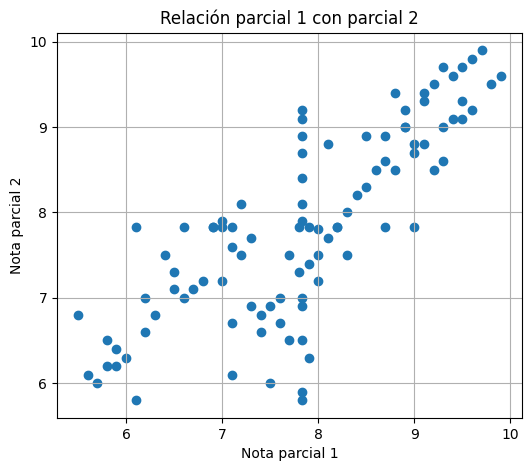

In [93]:
plt.figure(figsize=(6, 5))
plt.scatter(df["Parcial 1"], df["Parcial 2"])
plt.title("Relación parcial 1 con parcial 2")
plt.xlabel("Nota parcial 1")
plt.ylabel("Nota parcial 2")
plt.grid(True)

plt.show()

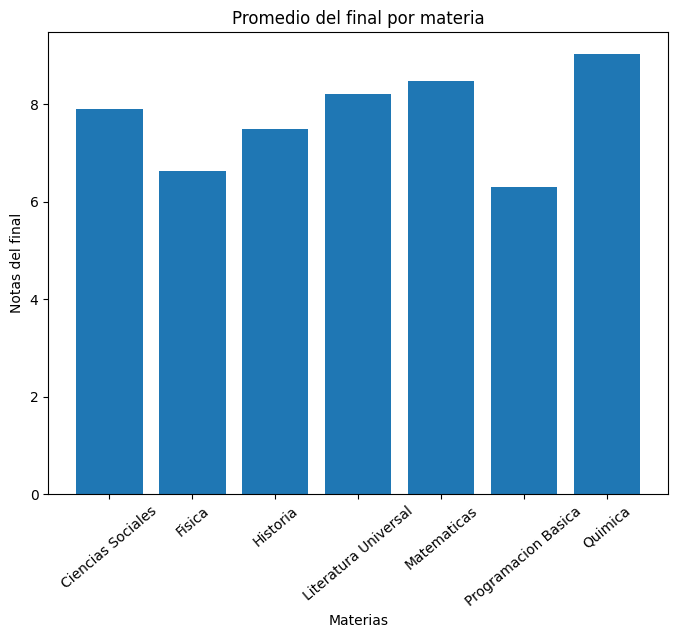

In [94]:
promedio_final_por_materia = df.groupby("Materia")["Final"].mean()

plt.figure(figsize=(8,6))
plt.bar(promedio_final_por_materia.index, promedio_final_por_materia.values)
plt.title("Promedio del final por materia")
plt.xlabel("Materias")
plt.ylabel("Notas del final")

plt.xticks(rotation=40)

plt.show()

### Exportación a archivo SQLite

In [ ]:
conn = sqlite3.connect('datasets_calificaciones.db')

df.to_sql('calificaciones', conn, index=False, if_exists="replace")

conn.close()